In [1]:
import sys
sys.path.append('./../')

import ikamoana.ikaseapodym as ikadym

from ikamoana.utils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFishDebug

In [2]:
configuration_filepath = "./../data/ikamoana_config/IkaSim_Example_Fish.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [3]:
my_sim.ika_params

{'start_distribution': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'seapodym_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/SEAPODYM_data/run-test/skj_CLT_e5_3_est.xml',
 'forcing_dir': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'start_time': numpy.datetime64('2000-01-15'),
 'duration_time': 94694400,
 'delta_time': 1296000,
 'output_delta_time': 2592000,
 'spatial_limits': {'lonlim': (120.0, 290.0), 'latlim': (-40.0, 50.0)},
 'files_only': False,
 'forcing_files': {'forcing_dataarray': {}, 'forcing_dataset': {}},
 'fields_interp_method': 'nearest',
 'start_length': 26.43,
 'ageing_cohort': True,
 'number_of_cohorts': 10000,
 'start_dynamic_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age',
 'start_dynamic_file_extension': 'dym',
 'start_static_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age5.nc',
 'start_cell': {'lon': 150

In [4]:
## Using Inna's feeding habitat : ########
# fh = xr.load_dataarray("./../../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc")
# my_sim.loadFields(from_habitat=fh)

## Using ikafield class : ################
my_sim.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


In [5]:
# my_sim.initializeParticleSet(particles_class=IkaFish, method="start_static_file")
my_sim.initializeParticleSet(particles_class=IkaFishDebug, method="start_dynamic_file")

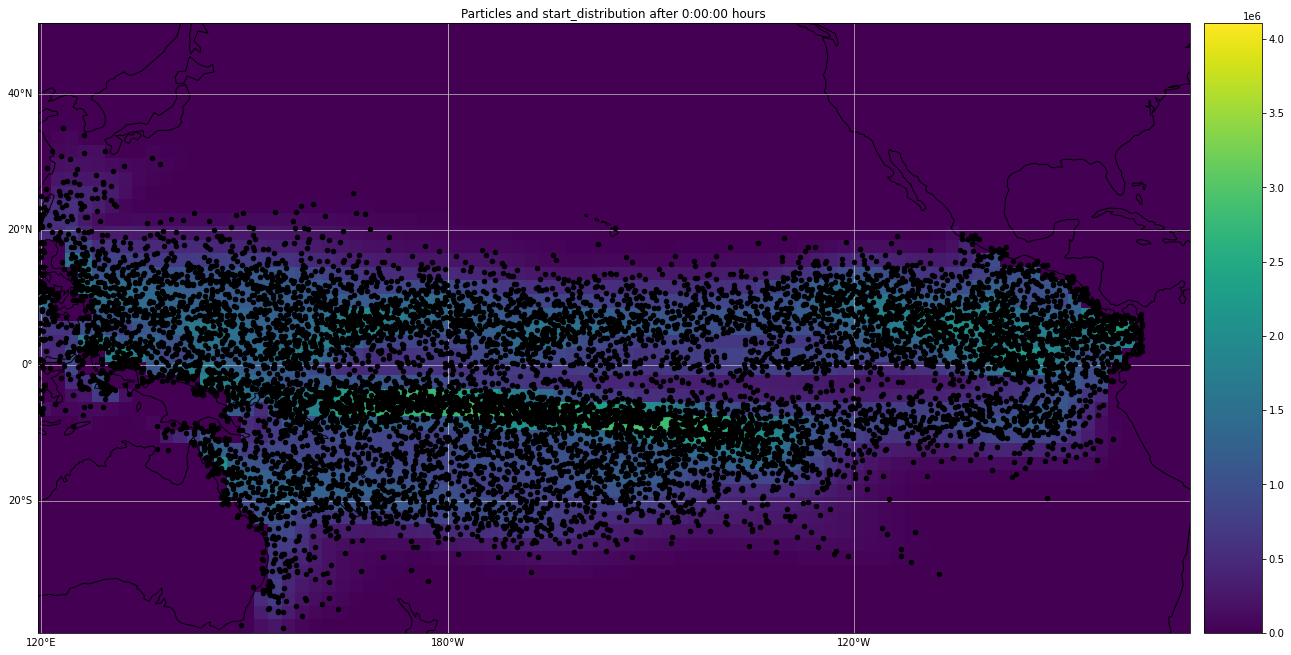

In [6]:
my_sim.fish.show(field=my_sim.ocean.start_distribution)

In [7]:
my_sim.runKernels(save=True)

INFO: Compiled ArrayIkaFishDebugCalcLonLatScalersIkAdvectionRK4TaxisRK4RandomWalkNonUniformDiffusionIkaDimMoveWithDiffusionRerollLandBlock ==> /tmp/parcels-1000/lib161f661ade79ff6cdf5f4fa159be4384_0.so
/home/ash/anaconda3/envs/ikamoana/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


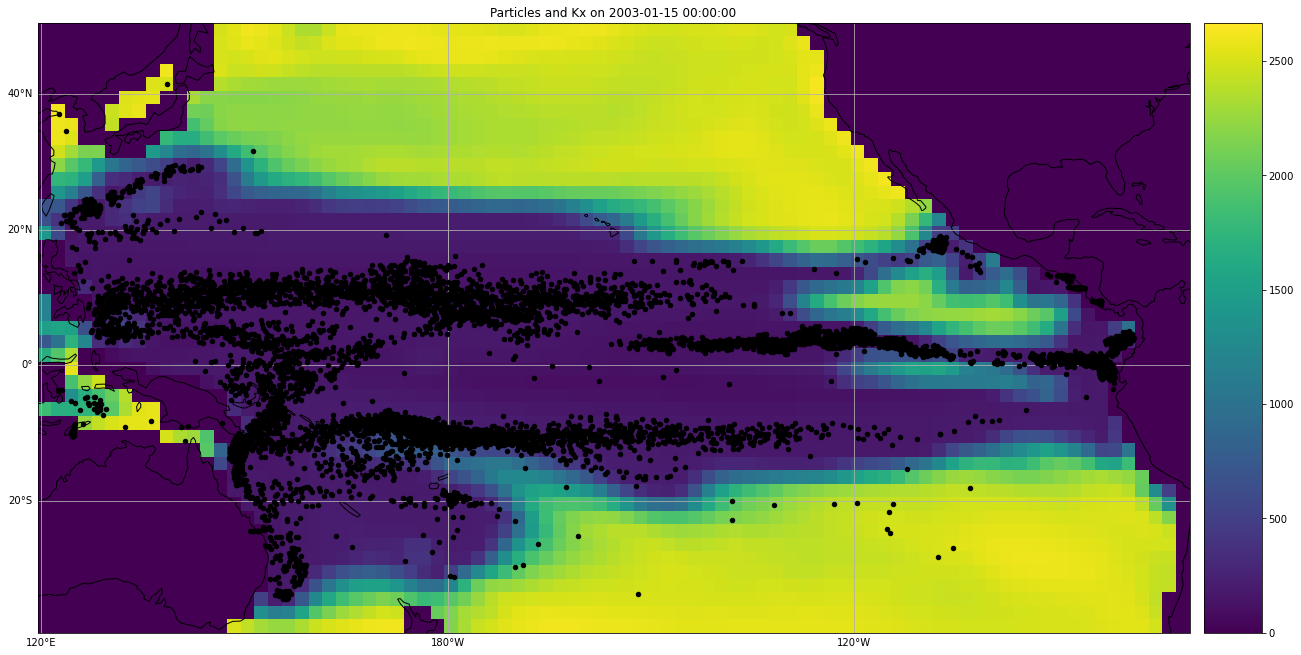

In [8]:
my_sim.fish.show(field=my_sim.ocean.Kx)

In [9]:
my_sim.fish[0]

P[0](lon=175.312531, lat=9.268001, depth=0.000000, Tx=-0.000017, Ty=-0.000035, age_class=6.000000, loop_count=0.000000, f_lat=0.000009, f_lon=0.000009, Dx=0.027293, Dy=0.028265, Cx=0.000003, Cy=-0.000049, Ax=-0.036506, Ay=0.018524, Rx_component=9507.068359, Ry_component=9506.826172, time=94694400.000000)

---

In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [14]:
filepath = "./IkaSim_Example_Fish_particleFile.nc"
particle_file = xr.load_dataset(filepath)
particle_file

<xarray.Dataset>
Dimensions:       (traj: 10000, obs: 38)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    trajectory    (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    time          (traj, obs) datetime64[ns] 2000-01-15 ... 2003-01-15
    lat           (traj, obs) float32 -2.794 -3.537 -3.694 ... 4.526 1.975 2.161
    lon           (traj, obs) float32 177.0 171.2 164.2 ... 250.9 251.4 249.8
    z             (traj, obs) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Tx            (traj, obs) float32 0.0 -0.0002133 ... 0.0003299 -0.0001519
    ...            ...
    Cx            (traj, obs) float32 0.0 -5.819e-06 ... 8.504e-05 2.537e-05
    Cy            (traj, obs) float32 0.0 0.001004 ... -0.01211 -0.001499
    Ax            (traj, obs) float32 0.0 -3.135 -3.514 ... 1.718 -1.698 -0.1229
    Ay            (traj, obs) float32 0.0 -0.06039 0.08296 ... -0.08888 0.00869
    Rx_component  (traj, obs) float32 0.0 1.145e+04 ... 3.384e+04 8.732e+03
    Ry_component  (traj, obs) float32 0.0 1.108e+04 ... 3.327e+04 8.252e+03
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.0
    parcels_mesh:           spherical

In [15]:
mean_Dx = np.absolute(particle_file['Dx']).mean(axis=0)
mean_Dy = np.absolute(particle_file['Dy']).mean(axis=0)
mean_Cx = np.absolute(particle_file['Cx']).mean(axis=0)
mean_Ax = np.absolute(particle_file['Ax']).mean(axis=0)
mean_Tx = np.absolute(particle_file['Tx']).mean(axis=0)

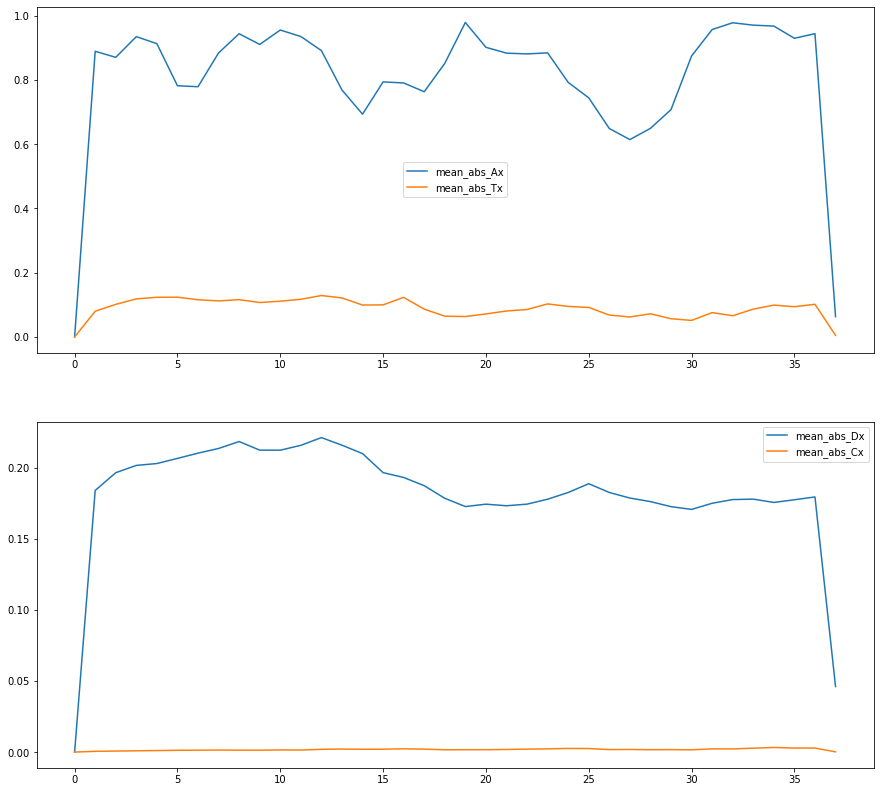

In [16]:
fig, (axe1, axe2) = plt.subplots(2,1,figsize=(15,14))

axe1.plot(mean_Ax)
axe1.plot(mean_Tx)
axe1.legend(["mean_abs_Ax","mean_abs_Tx"])

axe2.plot(mean_Dx)1/0.2
axe2.plot(mean_Cx)
axe2.legend(["mean_abs_Dx","mean_abs_Cx"])